In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../lib/VAD-Humbug'))
sys.path.insert(0, os.path.abspath('../lib/VAD-Humbug'))
sys.path.insert(0, os.path.abspath('../lib'))
import os
# if not os.getcwd().endswith('VAD-Humbug'):
#   os.chdir('../lib/VAD-Humbug')
from VAD_pipeline import VAD_pipeline
import matplotlib.pyplot as plt

import pickle
import util
import librosa
import numpy as np
import soundfile as sf
import ipdb

# VAD

In [ ]:
# Tanzania data

# directory = 'D:/Postdoc/Data/Semi Field Data/TanzaniaBednetOctober/02-10-2020/'
# subdirectories = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4']

directory = 'D:/Postdoc/Data/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'
subdirectories = ['A1']
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'

# # UK bednet data
# directory = 'D:/Postdoc/Data/Semi Field Data/UK bednet trial/'
# subdirectories = ['PHONE A', 'PHONE B']

# # Thai data
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Data/Thai/'
# subdirectories = ['sounds']

# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai'
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai'
# subdirectories = ['']




for subdir in subdirectories:
    listdirectory = os.listdir(directory + subdir) # gets the name of all files in your dir
    for filename in listdirectory: 
        if filename.endswith(".wav"): # check each of the files for whether or not they end in .wav:
            print(filename)
            LU = None
            timestamps = VAD_pipeline(directory + subdir, filename,
                         dir_out + subdir, agg=3, sr=8000, LU=LU)
            if not os.path.exists(dir_out + subdir): os.makedirs(dir_out + subdir)
            np.savetxt(dir_out + subdir + '/agg3_LU_' + str(LU) + '_VAD_pred_' + filename + '.txt', timestamps, fmt='%f', delimiter='\t')
            

# Load model for detection

In [2]:
with open('clf_log-mel-dB_depth5.pickle', 'rb') as handle:
    clf = pickle.load(handle)

In [3]:
from tensorflow import keras
model = keras.models.load_model('firstCNN_unnorm.h5')

C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ikiskin\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ikiskin

In [4]:
def get_wav_for_path(noise_path_names, sr):
    x = []
    signal_length = 0
    for path in noise_path_names:
        print(path)
        signal, _ = librosa.load(path, sr=sr)
        x.append(signal)
        signal_length += len(signal)/sr
    return x, signal_length

#1-25 .wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#1-25 .wav


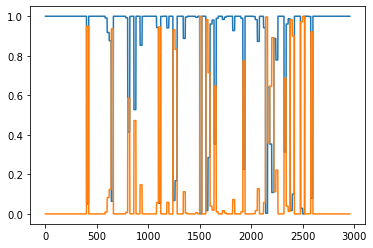

#114-124.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#114-124.wav


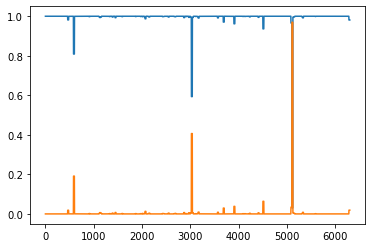

#125-150.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#125-150.wav


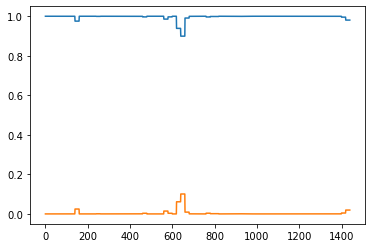

#151-173.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#151-173.wav


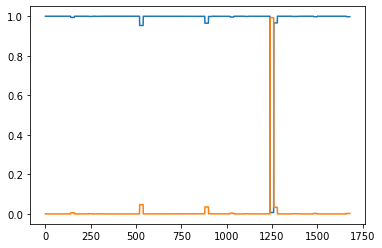

#187-188.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#187-188.wav


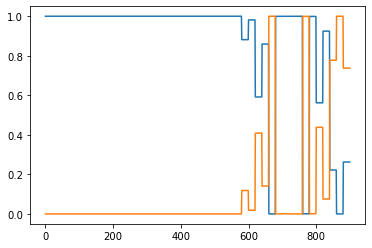

#209-219.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#209-219.wav


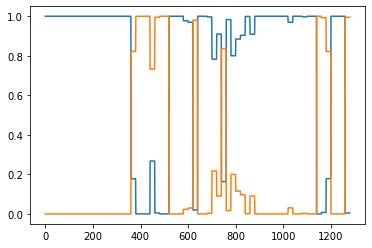

#235-239.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#235-239.wav


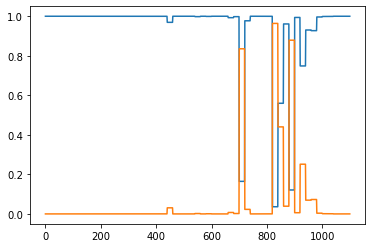

#251.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#251.wav


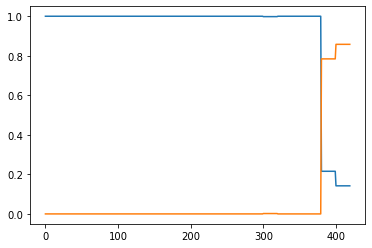

#254-260.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#254-260.wav


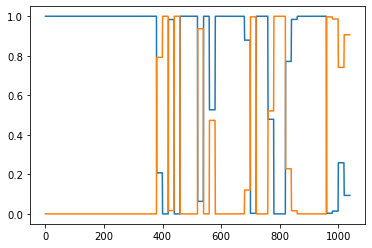

#26-60.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#26-60.wav


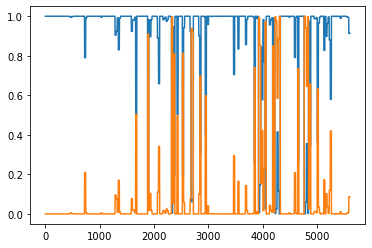

#295-312.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#295-312.wav


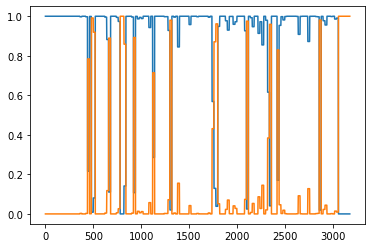

#313-348.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#313-348.wav


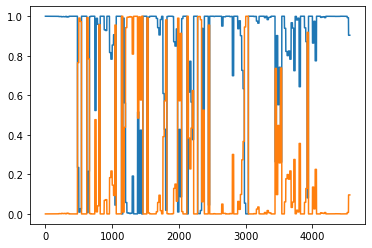

#349-357.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#349-357.wav


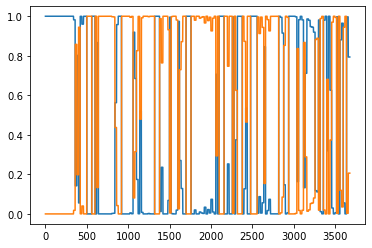

#359-379.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#359-379.wav


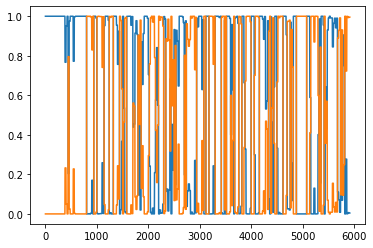

#380-406.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#380-406.wav


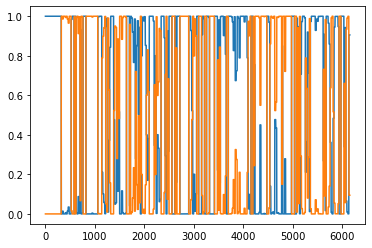

#407-422.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#407-422.wav


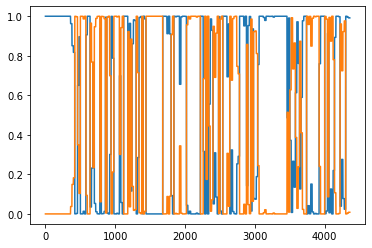

#423-487.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#423-487.wav


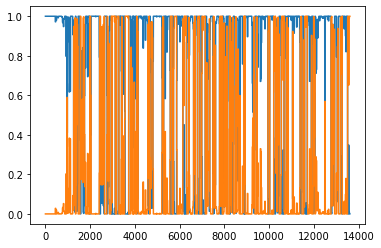

#69-79.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#69-79.wav


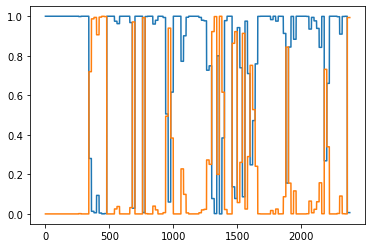

#97-113.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/#97-113.wav


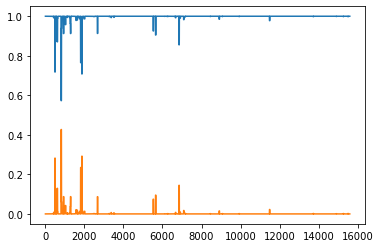

LUNone#1-25 .wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#1-25 .wav


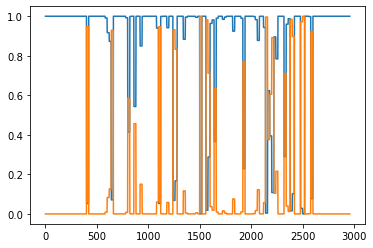

LUNone#114-124.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#114-124.wav


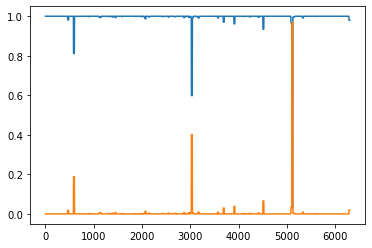

LUNone#125-150.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#125-150.wav


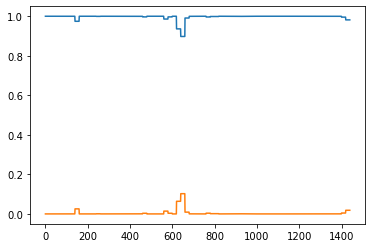

LUNone#151-173.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#151-173.wav


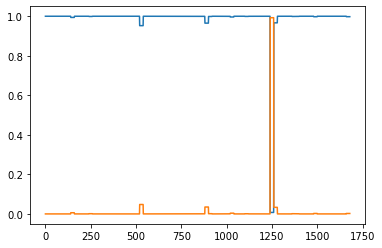

LUNone#187-188.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#187-188.wav


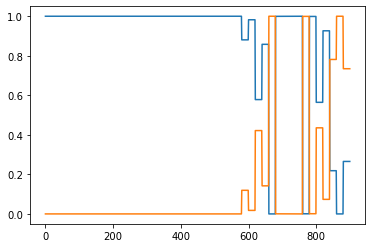

LUNone#209-219.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#209-219.wav


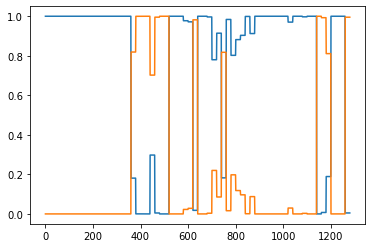

LUNone#235-239.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#235-239.wav


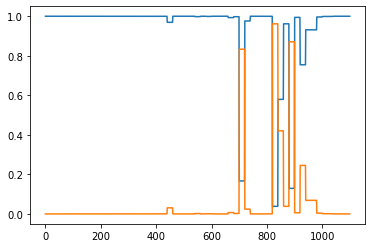

LUNone#251.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#251.wav


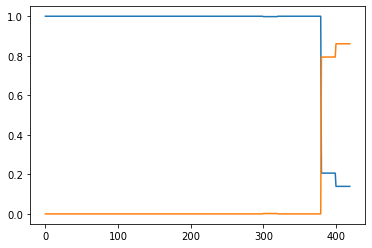

LUNone#254-260.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#254-260.wav


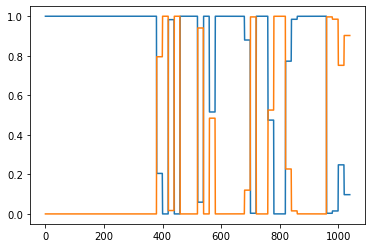

LUNone#26-60.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#26-60.wav


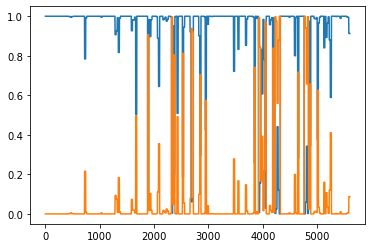

LUNone#295-312.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#295-312.wav


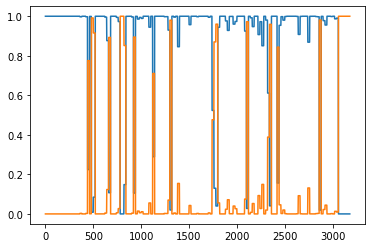

LUNone#313-348.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#313-348.wav


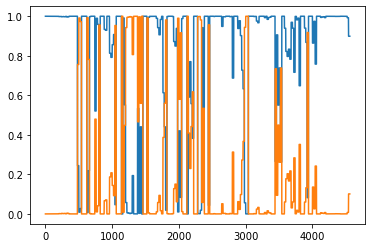

LUNone#349-357.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#349-357.wav


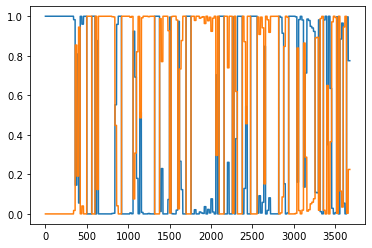

LUNone#359-379.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#359-379.wav


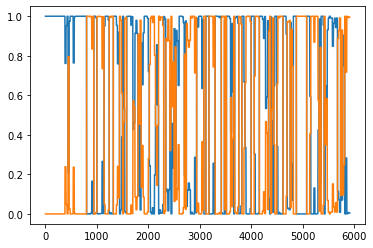

LUNone#380-406.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#380-406.wav


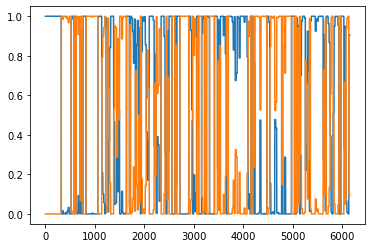

LUNone#407-422.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#407-422.wav


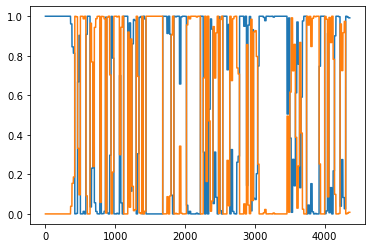

LUNone#423-487.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#423-487.wav


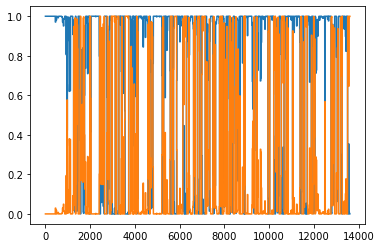

LUNone#69-79.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#69-79.wav


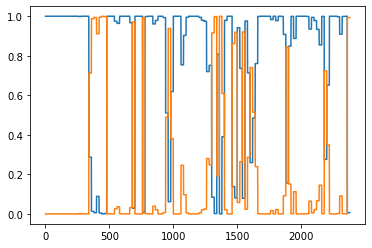

LUNone#97-113.wav
D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai/LUNone#97-113.wav


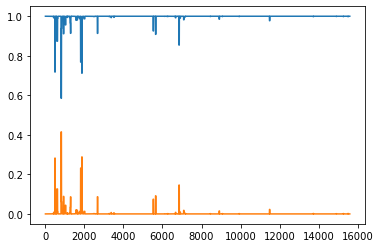

In [7]:
# Updated version of file detection from util.py here:

# raw = [r'D:\Postdoc\Data\Semi Field Data\UK bednet trial\PHONE A\2020-09-08_19.04.55.928__v0.wav']
# filtered = [r'D:\Postdoc\MozzDetectorTestingSQL\Code\notebooks\proc_data\VADout\2020-09-08_19.04.55.928__v0.wav']
# TzA = [r'D:\Postdoc\MozzDetectorTestingSQL\Code\notebooks\proc_data\VADout\TanzaniaBednetOctober\01-10-2020\B2\2020-10-01_18.44.21.802__v3.wav']
# TzAraw = [r'D:\Postdoc\Data\Semi Field Data\TanzaniaBednetOctober\01-10-2020\B2\2020-10-01_18.44.21.802__v3.wav']
# # Confirmed noise (Dav):
dav_noise = [r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise0.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise1.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise2.wav', 
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise3.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise4.wav',
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise5.wav', 
             r'D:\Postdoc\MozzDetectorTestingSQL\Data\Experiments\sounds\noise6.wav']




sr = 8000

# Tanzania
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/TanzaniaBednetOctober/02-10-2020/'
# subdirectories = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4']

directory = 'D:/Postdoc/Data/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'
subdirectories = ['A1', 'B1']
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/Semi Field Data/TanzaniaBednetOctober/2020-10-15 - 2020-10-16/'

# # subdirectories = ['A1']
directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai'
dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/label_out/debug/thai'

subdirectories = ['']


# # UK bednet
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/VADout/Semi Field Data/UK bednet trial/'
# subdirectories = ['PHONE A','PHONE B']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/Classifierout/VADout/Semi Field Data/UK bednet trial/'


# Thai
# directory = 'D:/Postdoc/MozzDetectorTestingSQL/Data/Thai/'
# subdirectories = ['sounds']
# dir_out = 'D:/Postdoc/MozzDetectorTestingSQL/Code/notebooks/proc_data/Classifierout/Thai/'


for subdir in subdirectories:
    listdirectory = os.listdir(directory + subdir) # gets the name of all files in your dir
    for filename in listdirectory: 
        if filename.endswith(".wav"): # check each of the files for whether or not they end in .wav:
            print(filename)
            x, x_l = get_wav_for_path([directory + subdir + '/' + filename], sr =8000)
#             print(np.shape(x))
#             X = util.get_feat(x, sr=8000, feat_type='log-mel', flatten = True)
            X_CNN = util.get_feat(x, sr=8000, feat_type='log-mel', flatten = False)
            X_CNN = util.reshape_feat(X_CNN, win_size=20, step_size=20)

            preds_CNN = model.predict(X_CNN)
            preds_list_CNN = util.detect_timestamps(np.repeat(preds_CNN, 20, axis=0))
            
            plt.plot(np.repeat(preds_CNN, 20, axis=0))
            plt.show()
#             preds_prob = clf.predict_proba(X)
#             preds_list = util.detect_timestamps(preds_prob)
            
#             print(np.shape(preds_CNN))
#             print(np.shape(preds_prob))
#             ipdb.set_trace()
                    
            if not os.path.exists(dir_out + subdir): os.makedirs(dir_out + subdir)
#             with open(dir_out + subdir + '/mozz_pred_list' + filename + '.pkl', 'wb') as f:
#                 pickle.dump(preds_list, f)
            np.savetxt(dir_out + subdir + '/full_db_CNN_mozz_pred_prob_' + filename + '.txt', preds_list_CNN, fmt='%f', delimiter='\t')
                               

# View pickled prediction list for chosen file

In [ ]:
preds = clf.predict(X)

In [ ]:
start_idx = 1
end_idx = 5

In [ ]:
preds[start_idx:end_idx]

In [ ]:
np.mean(preds_b[0:3][:,1])

In [ ]:
def detect_timestamps_debug(preds_prob, hop_length=512, sr=8000):

    preds = np.zeros(len(preds_prob))
    for i, pred in enumerate(preds_prob):
        if pred[1] > 0.5:
            preds[i] = 1


    frames = librosa.frames_to_samples(np.arange(len(preds)), hop_length=512)  
    sample_start = 0
    prob_start_idx = 0
    preds_list = []
    # mozz_pred_array = []
    for index, frame in enumerate(frames[:-1]):
        if preds[index] != preds[index+1]:
            sample_end = frames[index+1]
            prob_end_idx = index+1
            # print('sample_start', sample_start, prob_start_idx, 
            #  'sample_end', sample_end, prob_end_idx, 'label', preds[index])
            if preds[index] == 1:
                preds_list.append([sample_start/sr, sample_end/sr, np.mean(preds_prob[prob_start_idx:prob_end_idx][:,1])])
            sample_start = frames[index+1]  
            prob_start_idx = index+1     

        elif index+1 == len(frames[:-1]):
            sample_end = frames[index+1]
            prob_end_idx = index+1 
            # print('sample_start', sample_start, 'sample_end', sample_end, 'label', preds[index])
            if preds[index] == 1:
                preds_list.append([sample_start/sr, sample_end/sr, np.mean(preds_prob[prob_start_idx:prob_end_idx][:,1])])
            sample_start = frames[index+1]       
            prob_start_idx = index+1 
    return preds_list